In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

In [26]:
df = pd.read_csv('data/cars_info_preprocessed.csv')

**Câu hỏi:** *Kiểu dáng xe nào mà người dùng ưa thích nhất của từng hãng xe* (chỉ xét các hãng xe có số lượng xe > 100)

In [12]:
# Đếm tổng xe của từng hãng
car_counts = df['Brand'].value_counts().rename_axis('Brand').reset_index(name='counts')

# Lấy số lượng xe > 100
car_counts = car_counts[car_counts['counts'] > 100]

Tạo dataframe mới chỉ có các hãng xe có số lượng > 100

In [5]:
df_copy = df.copy()
cars = car_counts['Brand'].values
cars_df = df_copy[df_copy['Brand'].isin(cars)].reset_index(drop=True)

Sau khi có được dataframe mới bao gồm các xe ta cần, tiếp tục tìm kiểu dáng xe ưa thích

In [6]:
# Đếm số lượng tất cả kiểu dáng xe của từng hãng
counting_car = cars_df.groupby(["Brand", "Type"]
                              ).agg({'Type':'count'}
                                   ).rename(columns={'Type':'Count'}
                                           ).reset_index()

In [7]:
# Sắp xếp số lượng xe theo giá trị giảm dần theo từng hãng xe
counting_car = counting_car.sort_values(['Brand','Count'], ascending=False)

# Lấy giá trị cao nhất của từng hãng xe
counting_car_max = counting_car.groupby('Brand').head(1).reset_index(drop=True)

# Sắp xếp các giá trị đó theo thứ tự giảm dần
counting_car_max = counting_car_max.sort_values('Count',ascending=False)

Sau khi có được dataframe bao gồm số lượng kiểu dáng xe nhiều nhất của từng hãng, ta vẽ biểu đồ để thể hiện rõ hơn

Text(0, 0.5, 'Số lượng xe')

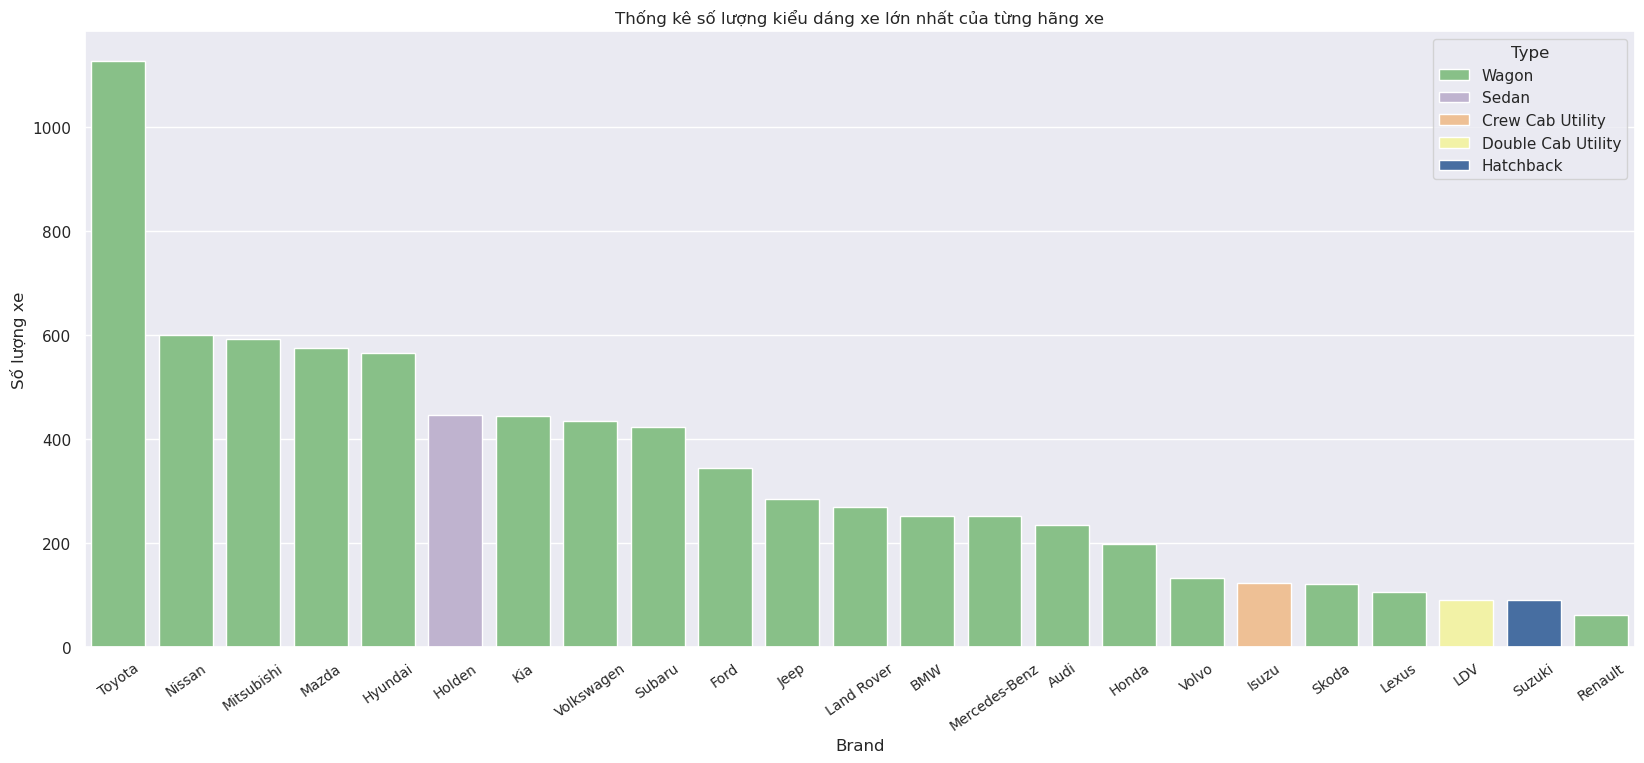

In [81]:
fig, axes = plt.subplots(figsize=(20,8))
s = sns.barplot(x='Brand',y='Count', hue='Type',data=counting_car_max,dodge=False,palette='Accent')
x_tick = plt.xticks(fontsize=10,rotation=35)
s.set_title('Thống kê số lượng kiểu dáng xe lớn nhất của từng hãng xe')
s.set_ylabel('Số lượng xe')

- Có vẻ kiểu dáng Wagon khá được nhiều người ưa chuộng ở mọi hãng xe.
- Sau khi tìm hiểu về kiểu dáng xe Wagon, em có kết luận:
    - Tuy kiểu dáng xe này chưa được phổ biến tại Việt Nam nhưng ở nước ngoài họ rất ưa chuộng.
    - Khả năng tiết kiệm nhiên liệu khá tốt.
    - Khoang xe rộng rãi.

**Câu hỏi:** *Tồng doanh thu của từng hãng xe qua từng năm là bao nhiêu?* (tuy đây là trang để người dùng đăng bán, nhưng ta xem giá tiền mà người bán đăng coi như lợi nhuận của hãng đó).

Ở đây ta cũng chỉ xét những hãng xe có số lượng xe > 100.

In [122]:
# Tạo dataframe với tổng doanh thu của từng hãng xe.
sum_price_cars = cars_df.groupby(['Brand','Year']
                                ).agg({'Price':'sum'}
                                     ).rename(columns={'Price':'Total Price'}
                                             ).reset_index()

Vẽ biểu đồ thể hiện doanh thu qua từng năm.

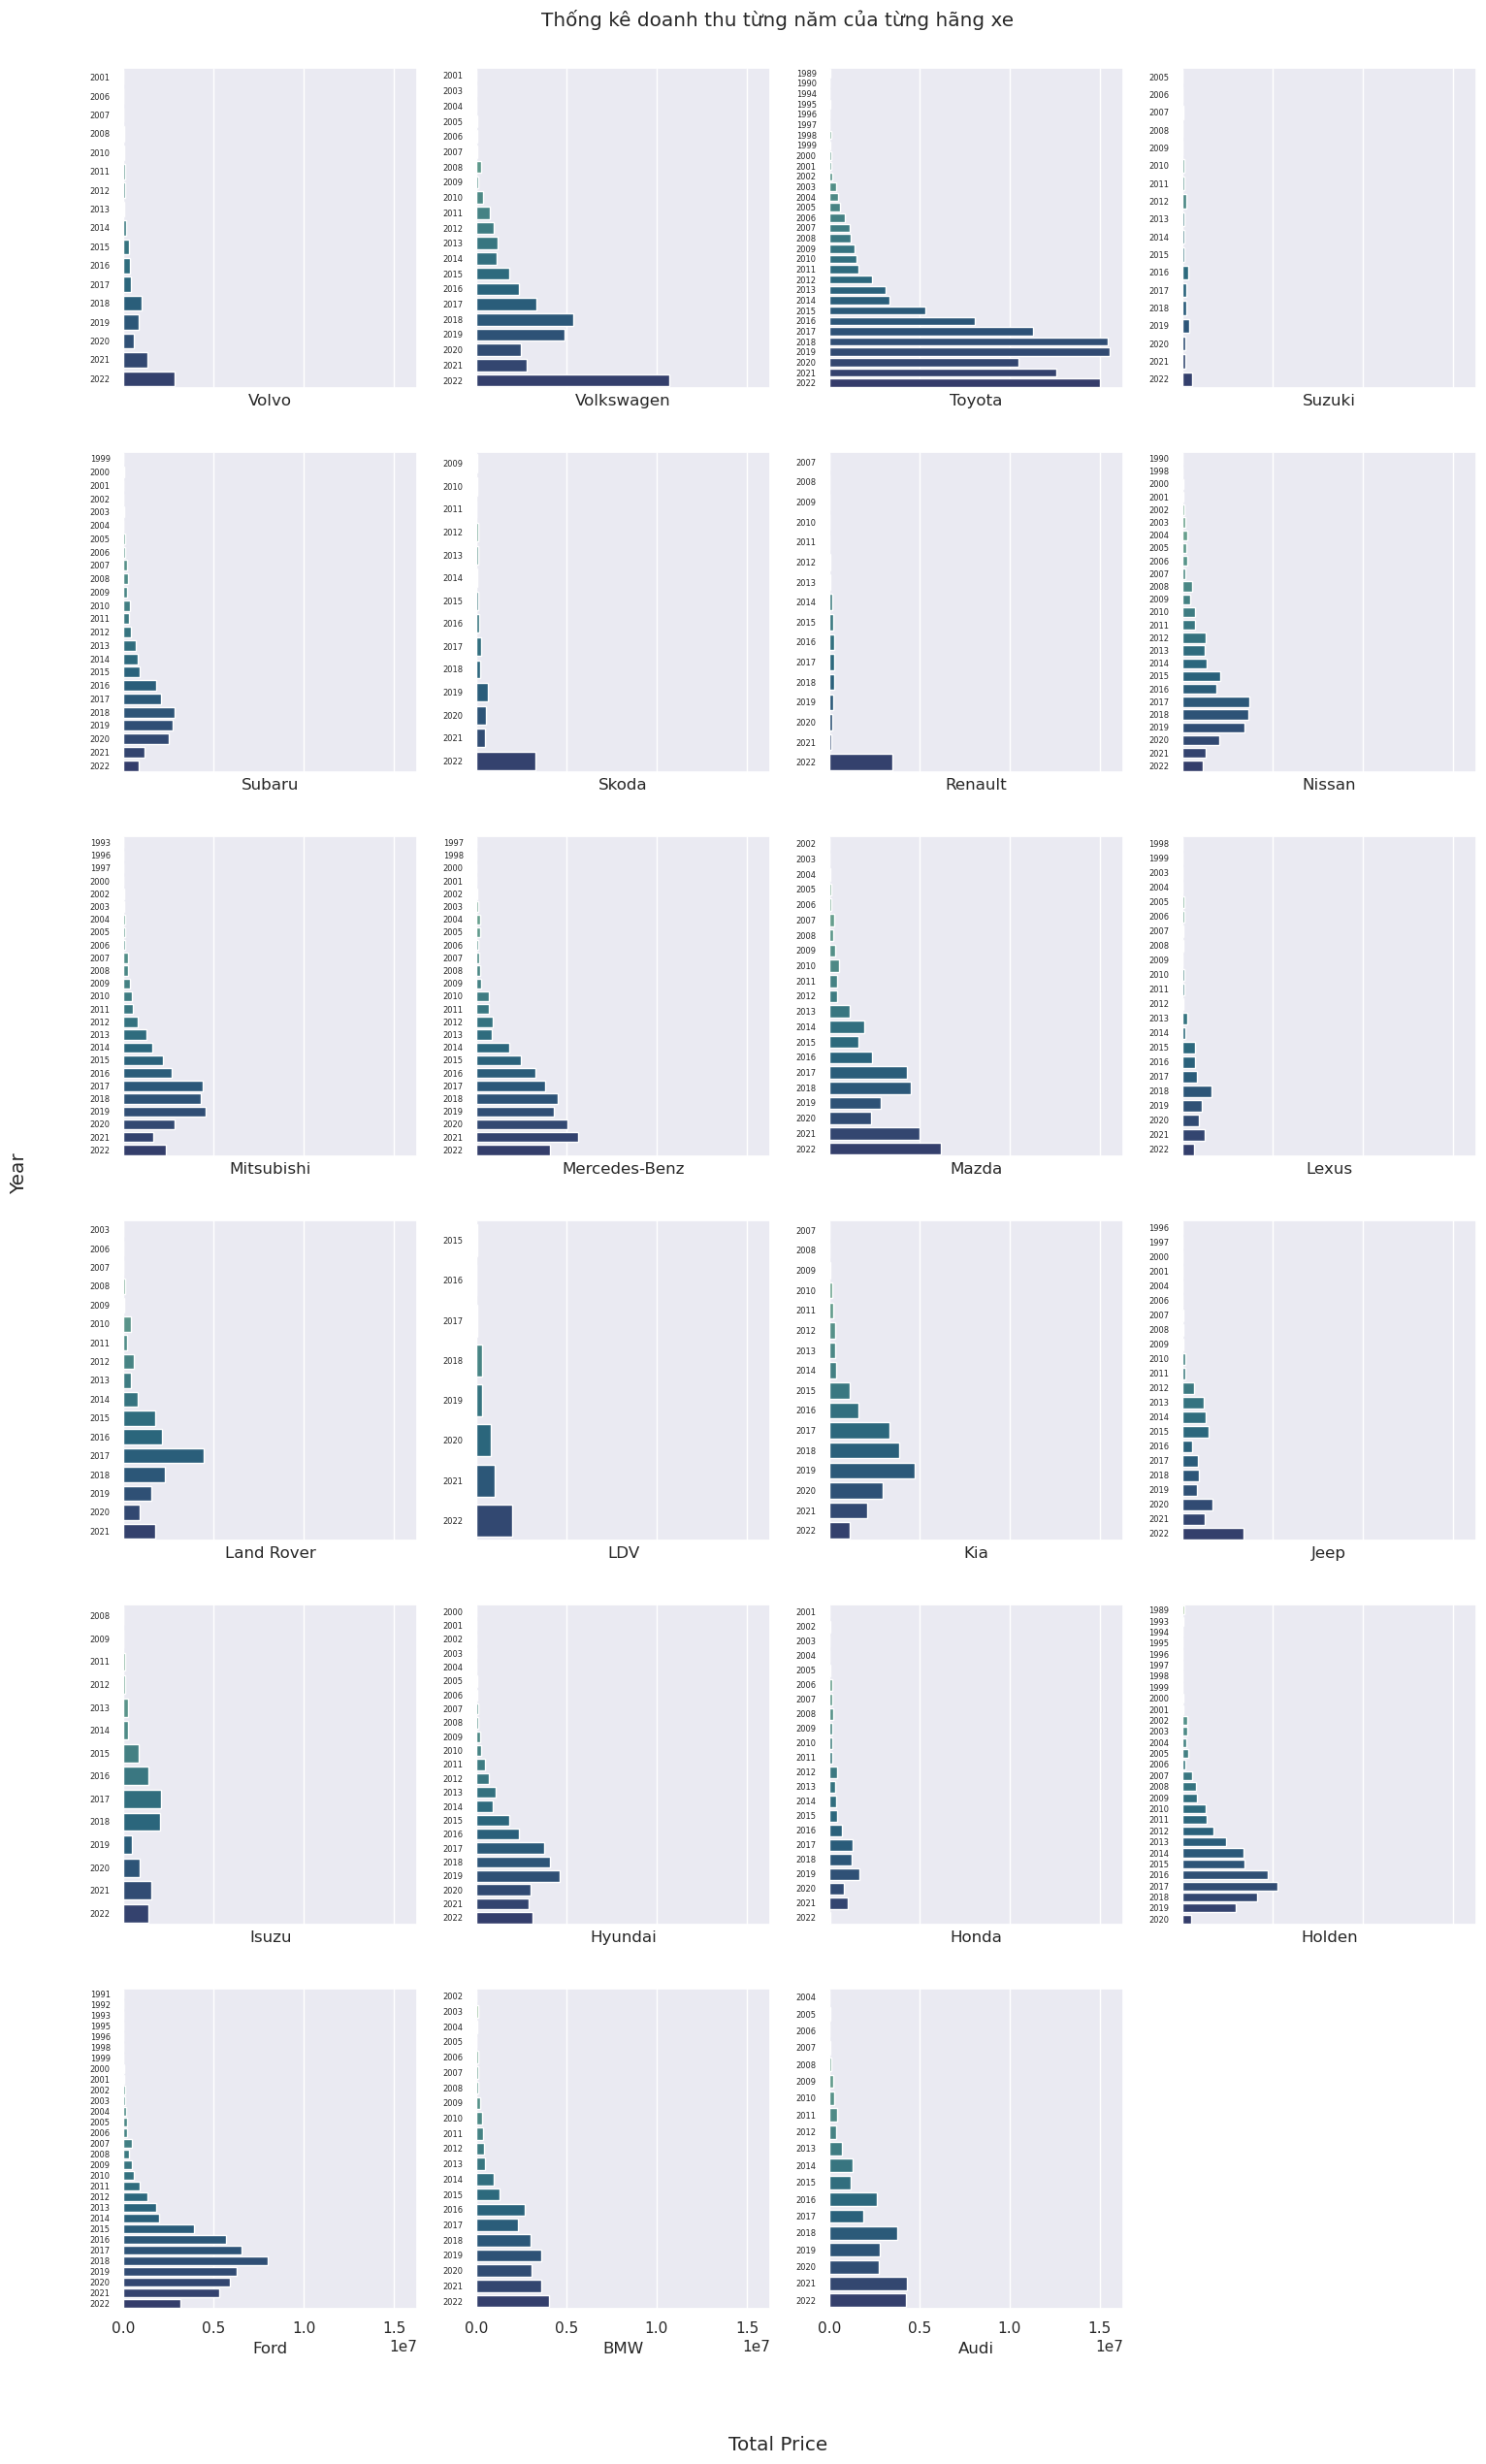

In [124]:
cars = sum_price_cars['Brand'].unique()
num_cars = len(cars)

ncols = 4
nrows = 6
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,30),sharex=True)

for i in range(nrows):
    for j in range(ncols):
        car = sum_price_cars[sum_price_cars['Brand']==cars[num_cars - 1]]
        year = car['Year'].values
        sns.barplot(x='Total Price',
                    y='Year',
                    data=car,
                    palette='crest',
                    orient='h',
                    ax=axes[i][j])
        axes[i][j].set_yticklabels(year, size=6)
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel(f'{cars[num_cars - 1]}')
        num_cars -= 1
     
fig.suptitle('Thống kê doanh thu từng năm của từng hãng xe',y=0.9)
fig.supylabel('Year', x=0.06)
fig.supxlabel('Total Price',y=0.06)
fig.delaxes(axes[5][3])
#axes[0][0].tick_params(axis='y', which='major', labelsize=6)

- Các hãng xe như Skoda, Renault, Volvo có doanh thu tăng đáng kể vào năm 2022.
- Có khá nhiều hãng xe có doanh thu cao vào năm (2016-2017) nhưng đến nay nó lại có xu hướng giảm
- 3 dòng xe Lexus, Suzuki và Honda có khá ít người bán lại có lẽ ít người dùng hoặc xe vẫn còn tốt nên người dùng không muốn bán.